<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=800 />


# Final Project: League of Legends Match Predictor


### Introduction

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.

### Step 1: Data Loading and Preprocessing

#### Task 1: Load the League of Legends dataset and preprocess it for training.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features.

Please take responsibility for managing and installing all the required libraries for this lab on your own.

#### Exercise 1:

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.


In [ ]:
## Write your code here
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv("league_of_legends_data_large.csv")
#df.info()

In [ ]:
# Create Feature, Target, and Train/Test variables from df
X = df.drop("win", axis = 1)
y = df["win"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Print the shapes of the tensors
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

X_train_tensor shape: torch.Size([800, 8])
y_train_tensor shape: torch.Size([800])
X_test_tensor shape: torch.Size([200, 8])
y_test_tensor shape: torch.Size([200])


### Step 2: Logistic Regression Model

#### Task 2: Implement a logistic regression model using PyTorch.

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.

#### Exercise 2:

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.


In [ ]:
## Write your code here

import torch.nn as nn
import torch.optim as optim

# Define the  model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)

# Define the Binary Cross Entropy Loss function
criterion = nn.BCELoss()

# Define Stochastic Gradient Descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Print model summary
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


### Step 3: Model Training

#### Task 3: Train the logistic regression model on the dataset.

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters .

#### Exercise 3:

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.


In [ ]:
# Write your code here
epochs = 1000
for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Forward pass
    outputs = model(X_train_tensor).squeeze()  # Squeeze to remove extra dimension
    loss = criterion(outputs, y_train_tensor)  # Compute loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update model parameters

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")



Epoch [10/1000], Loss: 0.7840
Epoch [20/1000], Loss: 0.7793
Epoch [30/1000], Loss: 0.7748
Epoch [40/1000], Loss: 0.7705
Epoch [50/1000], Loss: 0.7663
Epoch [60/1000], Loss: 0.7623
Epoch [70/1000], Loss: 0.7586
Epoch [80/1000], Loss: 0.7549
Epoch [90/1000], Loss: 0.7515
Epoch [100/1000], Loss: 0.7482
Epoch [110/1000], Loss: 0.7450
Epoch [120/1000], Loss: 0.7420
Epoch [130/1000], Loss: 0.7391
Epoch [140/1000], Loss: 0.7364
Epoch [150/1000], Loss: 0.7338
Epoch [160/1000], Loss: 0.7313
Epoch [170/1000], Loss: 0.7290
Epoch [180/1000], Loss: 0.7267
Epoch [190/1000], Loss: 0.7246
Epoch [200/1000], Loss: 0.7226
Epoch [210/1000], Loss: 0.7207
Epoch [220/1000], Loss: 0.7188
Epoch [230/1000], Loss: 0.7171
Epoch [240/1000], Loss: 0.7154
Epoch [250/1000], Loss: 0.7139
Epoch [260/1000], Loss: 0.7124
Epoch [270/1000], Loss: 0.7110
Epoch [280/1000], Loss: 0.7096
Epoch [290/1000], Loss: 0.7084
Epoch [300/1000], Loss: 0.7072
Epoch [310/1000], Loss: 0.7060
Epoch [320/1000], Loss: 0.7049
Epoch [330/1000],

### Step 4: Model Optimization and Evaluation

#### Task 4: Implement optimization techniques and evaluate the model's performance.

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

#### Exercise 4:

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.


In [ ]:
## Write your code here

def evaluate_model(model, X_tensor, y_tensor):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(X_tensor).squeeze()  # Predictions
        predictions = (outputs >= 0.5).int()  # Threshold at 0.5 for binary classification
        accuracy = (predictions == y_tensor).sum().item() / y_tensor.size(0)
    return accuracy

# Evaluate on training and testing sets
train_accuracy = evaluate_model(model, X_train_tensor, y_train_tensor)
test_accuracy = evaluate_model(model, X_test_tensor, y_test_tensor)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")



Training Accuracy: 0.5475
Testing Accuracy: 0.5050


### Step 5: Visualization and Interpretation

#### Task 5: Visualize the model's performance and interpret the results.

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

#### Exercise 5:

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


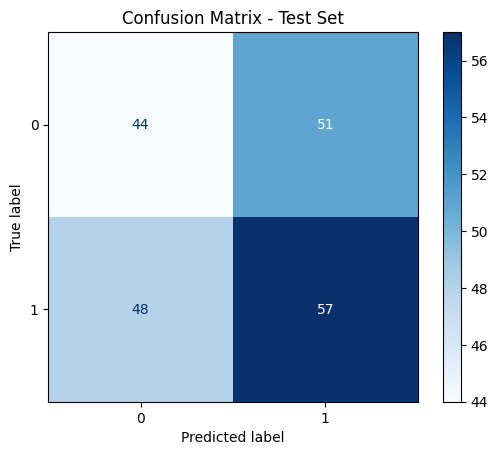

Classification Report - Test Set
              precision    recall  f1-score   support

         0.0       0.48      0.46      0.47        95
         1.0       0.53      0.54      0.54       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



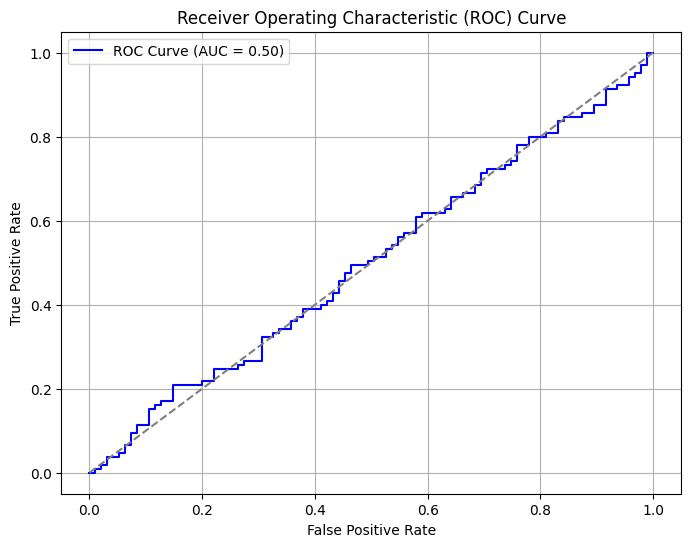

In [ ]:
## Write your code here
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

# Evaluate model predictions
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    train_outputs = model(X_train_tensor).squeeze()
    test_outputs = model(X_test_tensor).squeeze()

# Convert predictions to binary using a 0.5 threshold
train_predictions = (train_outputs >= 0.5).int()
test_predictions = (test_outputs >= 0.5).int()

# Confusion Matrix for Testing Set
cm = confusion_matrix(y_test_tensor.numpy(), test_predictions.numpy())
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.show()

# Classification Report
print("Classification Report - Test Set")
print(classification_report(y_test_tensor.numpy(), test_predictions.numpy()))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), test_outputs.numpy())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line to simulate random guessing model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()



### Step 6: Model Saving and Loading

#### Task 6: Save and load the trained model.

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.

#### Exercise 6:

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.


In [ ]:
## Write your code here
model_path = "logistic_regression_model.pth"  # File path where the model will be saved
torch.save(model.state_dict(), model_path)  # Save model's state_dict

print(f"Model saved to {model_path}")

# Load the trained model
loaded_model = LogisticRegressionModel(input_dim=8)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()  # Set model to evaluation mode

with torch.no_grad():
    # Evaluate on the test set (using the loaded model)
    test_outputs = loaded_model(X_test_tensor).squeeze()
    test_predictions = (test_outputs >= 0.5).int()  # Convert to binary predictions
    test_accuracy = (test_predictions == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f"Test Accuracy of Loaded Model: {test_accuracy:.4f}")


Model saved to logistic_regression_model.pth
Test Accuracy of Loaded Model: 0.5050


<ipython-input-85-7ccd77c952e7>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_path))


### Step 7: Hyperparameter Tuning

#### Task 7: Perform hyperparameter tuning to find the best learning rate.

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .

#### Exercise 7:

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.


Learning Rate: 0.001, Test Accuracy: 0.5400
Learning Rate: 0.01, Test Accuracy: 0.5150
Learning Rate: 0.1, Test Accuracy: 0.4750
Learning Rate: 0.2, Test Accuracy: 0.4850
Learning Rate: 0.5, Test Accuracy: 0.4800


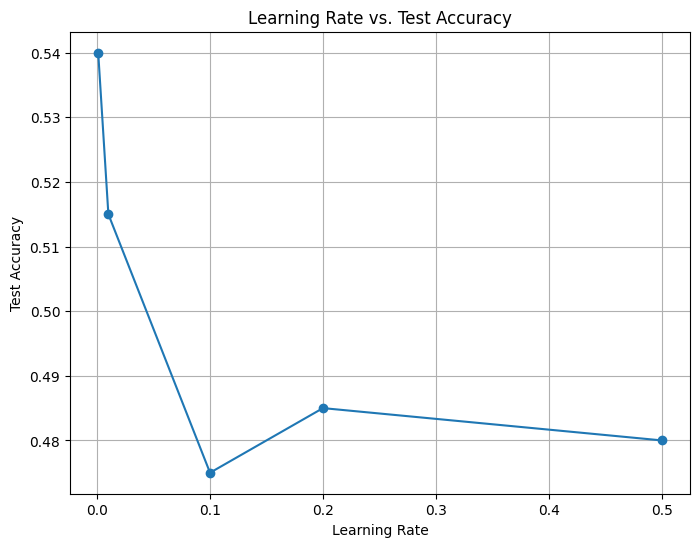

In [ ]:
## Write your code here

# Function to train and evaluate the model for a given learning rate
def train_and_evaluate_model(lr, model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=100):
    # Define the optimizer with the given learning rate
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)  # L2 regularization with weight_decay
    criterion = torch.nn.BCEWithLogitsLoss()  # Loss function for binary classification

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)  # Compute the loss

        # Backward pass and optimization
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters

    # Evaluation on the test set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        test_predictions = (test_outputs >= 0.5).int()  # Binary classification threshold
        test_accuracy = (test_predictions == y_test_tensor).sum().item() / y_test_tensor.size(0)

    return test_accuracy

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5]

# Store results for each learning rate
results = []

# Loop through each learning rate, train, and evaluate the model
for lr in learning_rates:
    # Initialize the model for each learning rate
    model = LogisticRegressionModel(input_dim=8)

    # Train and evaluate the model
    accuracy = train_and_evaluate_model(lr, model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    results.append((lr, accuracy))
    print(f"Learning Rate: {lr}, Test Accuracy: {accuracy:.4f}")

# Plotting the results
learning_rates, accuracies = zip(*results)
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy")
plt.title("Learning Rate vs. Test Accuracy")
plt.grid(True)
plt.show()


### Step 8: Feature Importance

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

The code to evaluate feature importance to understand the impact of each feature on the prediction.

#### Exercise 8:

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.


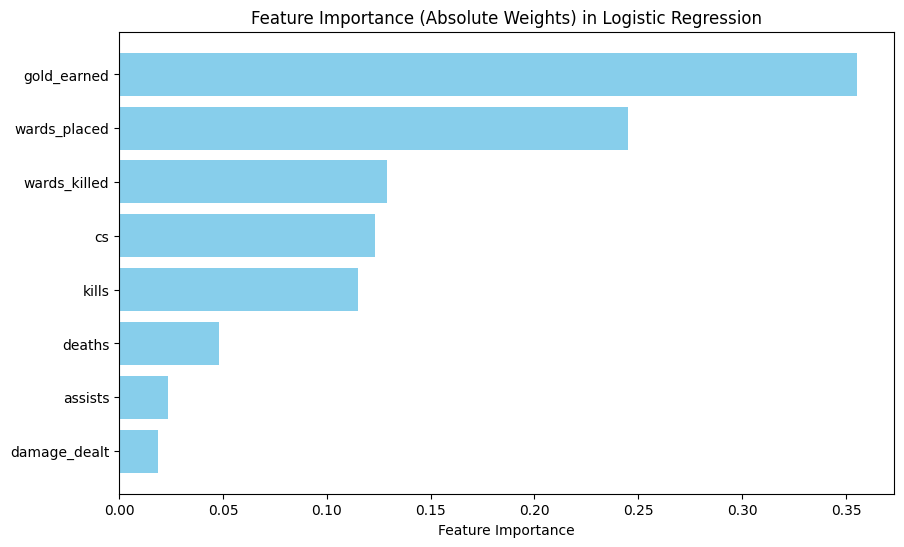

In [ ]:
## Write your code here

# Function to extract and visualize feature importance
def plot_feature_importance(model, X_train):
    # Extract weights (coefficients) from the model's linear layer
    feature_importance = model.linear.weight.detach().numpy().flatten()  # Get the model weights

    # Create a DataFrame to display feature importance alongside feature names
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })

    # Sort features by importance (absolute value of weights)
    feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Absolute Weights) in Logistic Regression')
    plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
    plt.show()

# Call the function to plot feature importance
plot_feature_importance(model, X_train)


#### Conclusion:

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
